In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('ggplot')

In [4]:
data = pd.read_csv(
    '/Users/shaikmohammadasrarahammad/Downloads/Internship/codealpha/task_1/data/TSLA.csv')

In [5]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       639 non-null    object 
 1   High       639 non-null    float64
 2   Low        639 non-null    float64
 3   Open       639 non-null    float64
 4   Close      639 non-null    float64
 5   Volume     639 non-null    float64
 6   Adj Close  639 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.1+ KB


In [7]:
data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,639.000000,639.000000,639.000000,639.000000,6.390000e+02,639.000000
mean,543.362885,517.883537,531.004088,531.298030,4.819130e+07,531.298030
std,340.837426,325.395864,333.534448,333.362040,3.579030e+07,333.362040
min,46.896000,44.855999,45.959999,46.285999,9.800600e+06,46.285999
25%,170.258003,162.379997,167.349998,164.783005,2.392195e+07,164.783005
50%,620.409973,595.500000,603.880005,605.130005,3.448900e+07,605.130005
75%,796.584991,767.744995,779.445007,781.304993,6.329725e+07,781.304993
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034


In [36]:
data.shape

(639, 7)

In [43]:
data['Date'] = pd.to_datetime(data['Date'])

In [44]:
data = data.set_index('Date')

In [45]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [50]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.998930,0.999275,0.999116,-0.534646,0.999116
Low,0.998930,1.000000,0.998996,0.999112,-0.552558,0.999112
Open,0.999275,0.998996,1.000000,0.998002,-0.543403,0.998002
Close,0.999116,0.999112,0.998002,1.000000,-0.541623,1.000000
Volume,-0.534646,-0.552558,-0.543403,-0.541623,1.000000,-0.541623
Adj Close,0.999116,0.999112,0.998002,1.000000,-0.541623,1.000000


<Axes: xlabel='Date'>

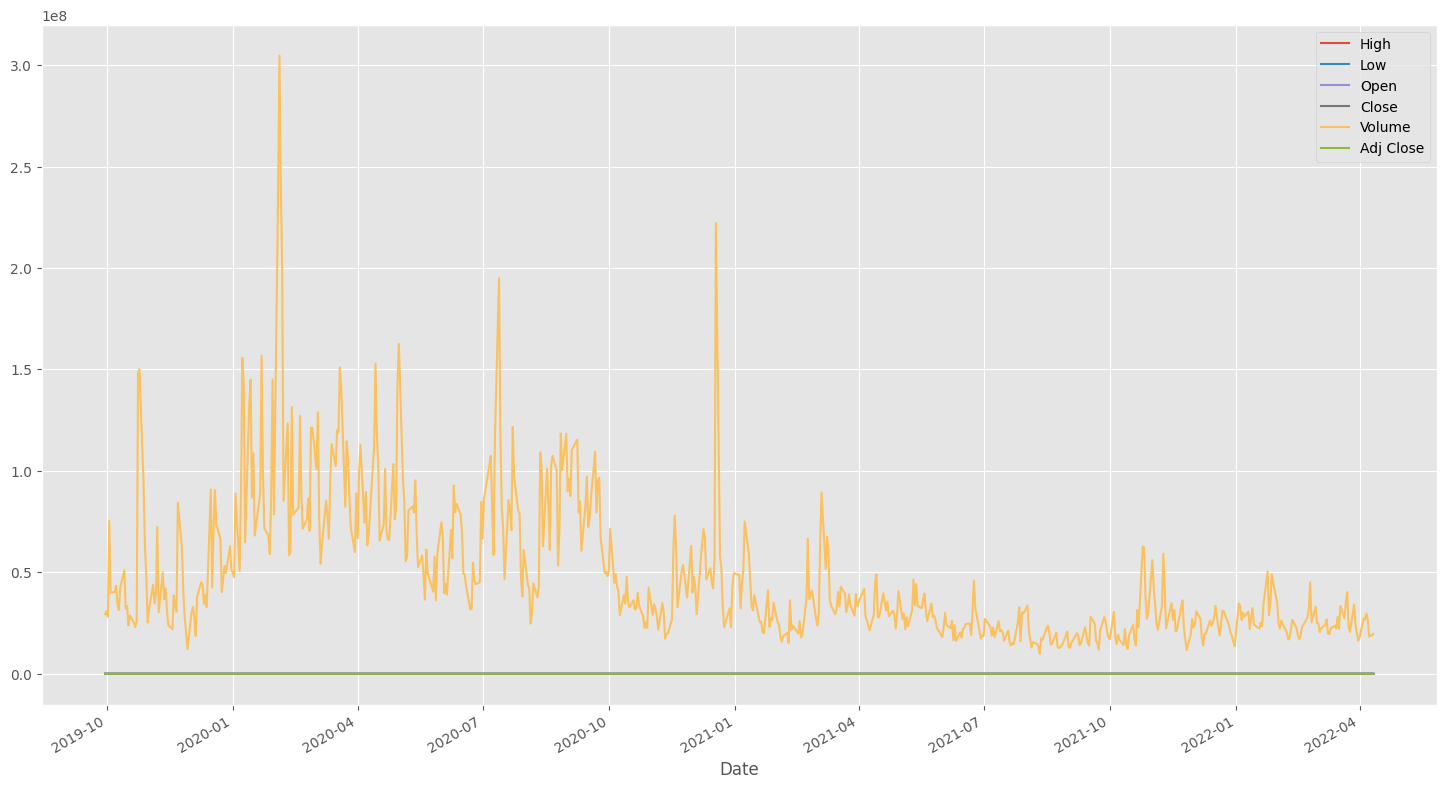

In [52]:
data.plot(figsize=(18,10))

Text(0.5, 0, 'Date')

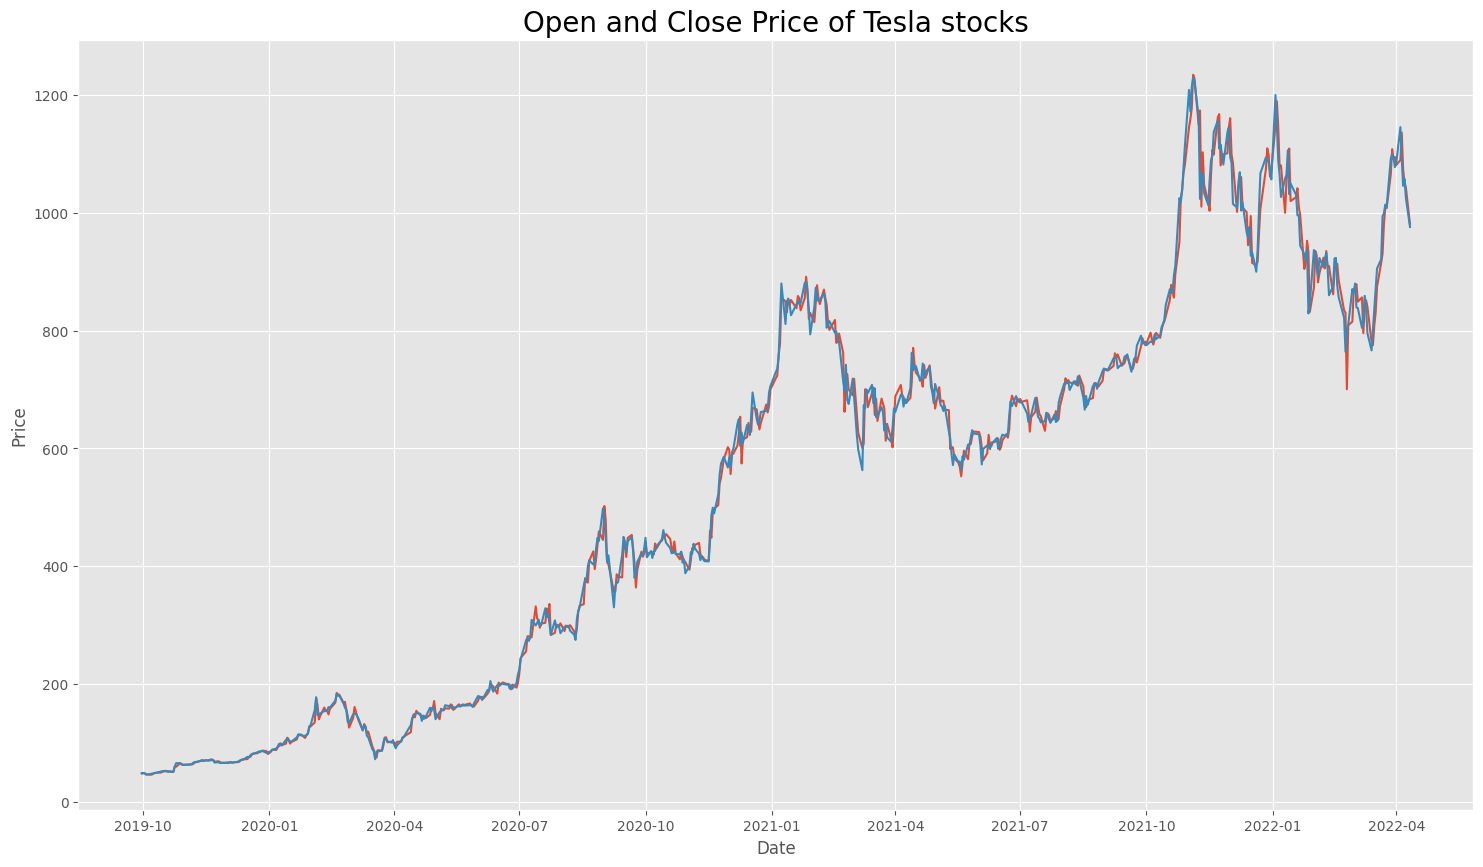

In [58]:
plt.figure(figsize=(18,10))
plt.plot(data['Open'])
plt.plot(data['Close'])
plt.title('Open and Close Price of Tesla stocks',fontsize=20)
plt.ylabel("Price")
plt.xlabel("Date")

Text(0.5, 1.0, 'High and Low Stock Prices for Tesla')

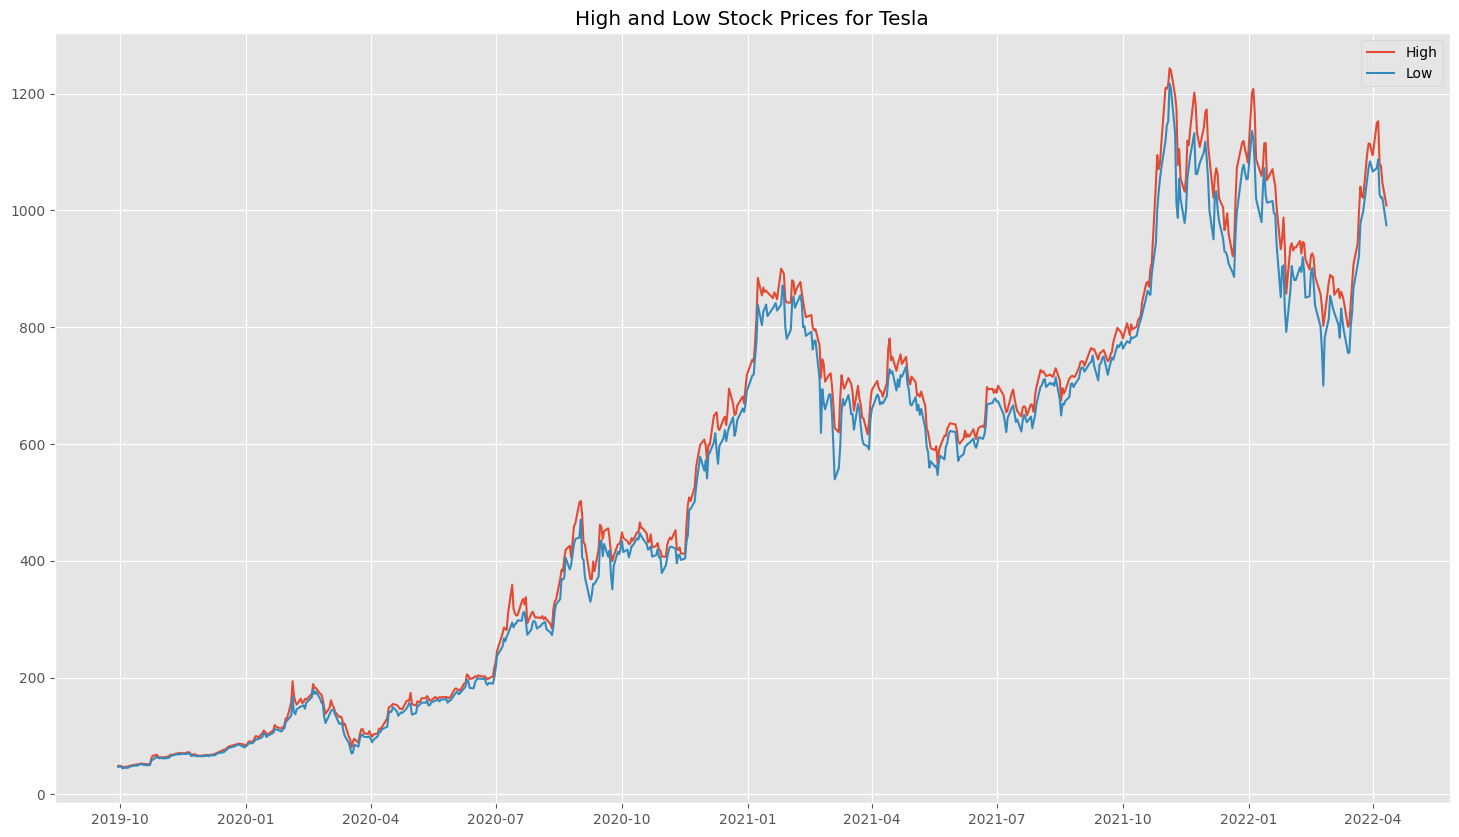

In [55]:
plt.figure(figsize = (18,10))
plt.plot(data['High'])
plt.plot(data['Low'])
plt.legend(['High','Low'])
plt.title('High and Low Stock Prices for Tesla',fontsize=20)

In [56]:
data['MA10'] = data['Adj Close'].rolling(window = 10).mean()
data['MA30'] = data['Adj Close'].rolling(window = 30).mean()
data['MA50'] = data['Adj Close'].rolling(window = 50).mean()
data['MA100'] = data['Adj Close'].rolling(window = 100).mean()

Text(0.5, 1.0, 'Close Price and Mean Average')

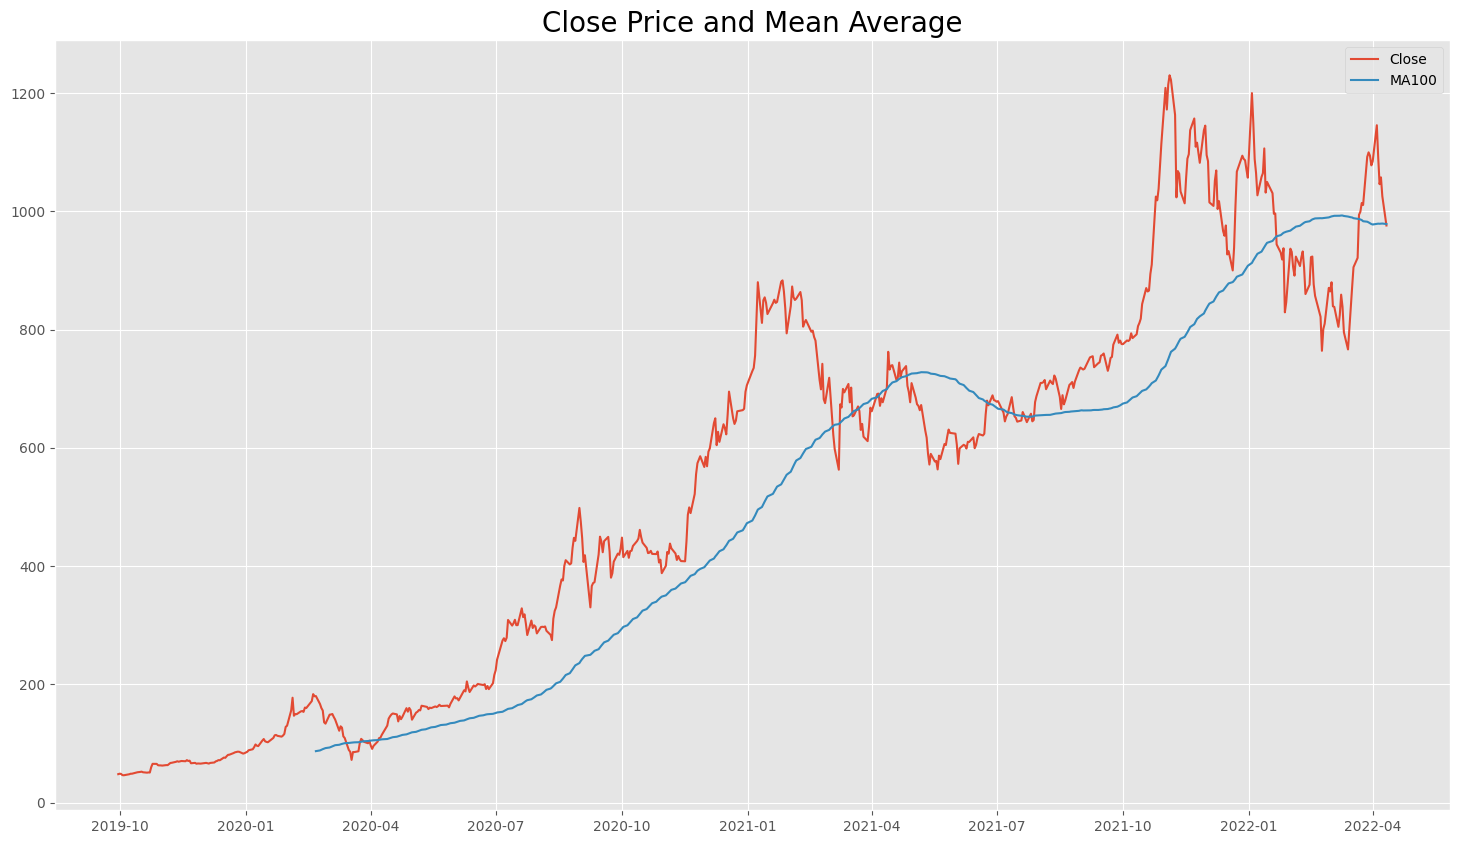

In [57]:
plt.figure(figsize = (18,10))
plt.plot(data['Close'])
plt.plot(data['MA100'])
plt.legend(['Close', 'MA100'])
plt.title('Close Price and Mean Average', fontsize = 20)

In [59]:
df = pd.DataFrame()
df['TSLA'] = data['Adj Close']
df['MA30'] = data['MA30']
df['MA100'] = data['MA100']

In [60]:
def buy_sell(df):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(df)):
        if df['MA30'][i] > df['MA100'][i]:
            if flag != 1:
                sigPriceBuy.append(df['TSLA'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif df['MA30'][i] < df['MA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(df['TSLA'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy,sigPriceSell)

In [61]:
buy_sell = buy_sell(df)
df['Buy_Signal_Price'] = buy_sell[0]
df['Sell_Signal_Price'] = buy_sell[1]

/var/folders/kh/nby254ps3kv79sh2q9w5ndh80000gn/T/ipykernel_14685/417152488.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['MA30'][i] > df['MA100'][i]:
/var/folders/kh/nby254ps3kv79sh2q9w5ndh80000gn/T/ipykernel_14685/417152488.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['MA30'][i] < df['MA100'][i]:
/var/folders/kh/nby254ps3kv79sh2q9w5ndh80000gn/T/ipykernel_14685/417152488.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

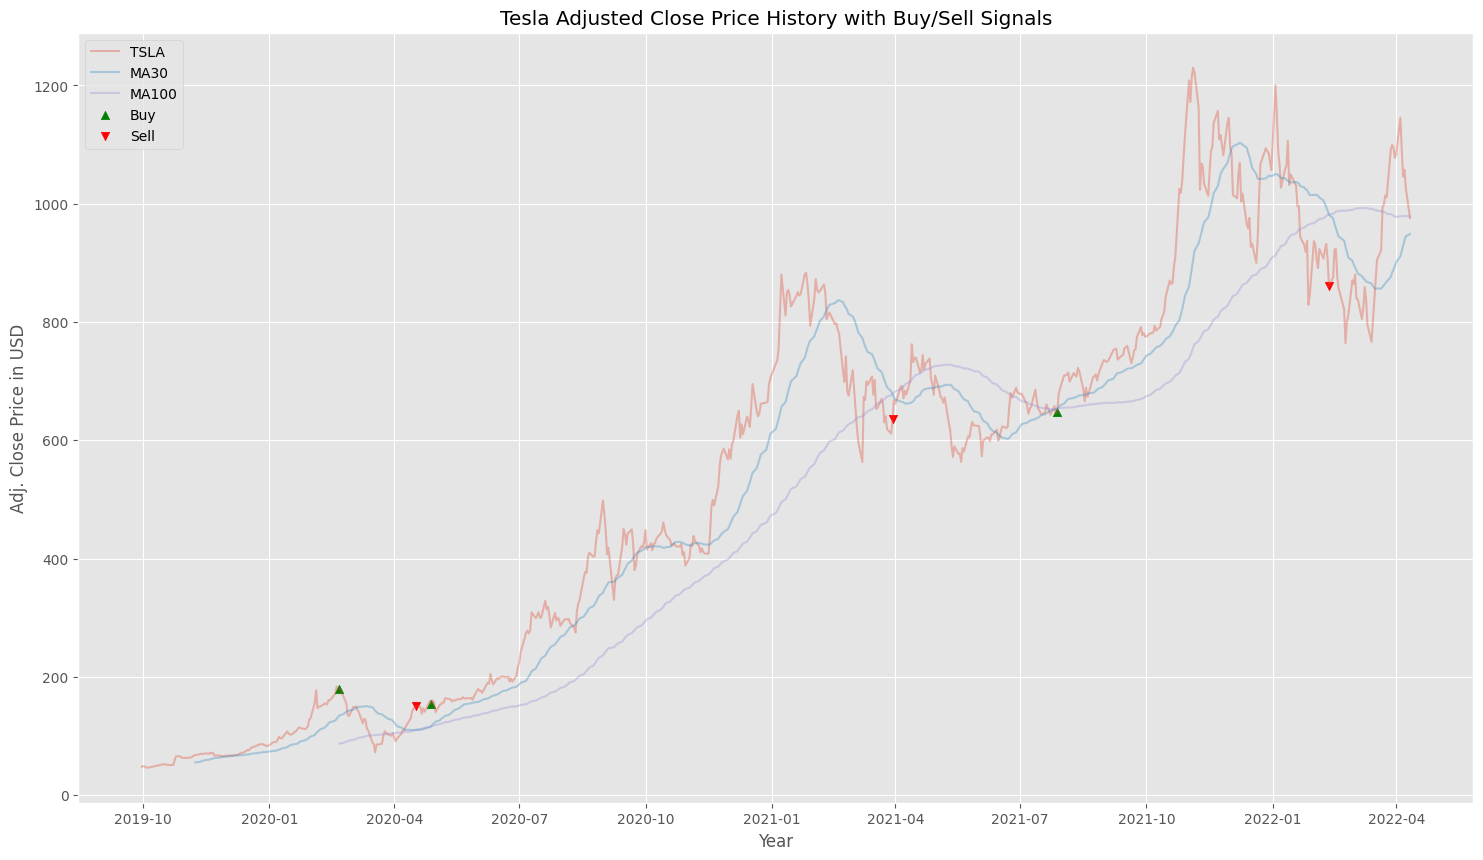

In [63]:
plt.figure(figsize=(18,10))
plt.plot(df['TSLA'], label = 'TSLA', alpha=0.35)
plt.plot(df['MA30'], label = 'MA30', alpha=0.35)
plt.plot(df['MA100'], label = 'MA100', alpha=0.35)
plt.scatter(df.index, df['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(df.index, df['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Tesla Adjusted Close Price History with Buy/Sell Signals')
plt.xlabel('Year')
plt.ylabel('Adj. Close Price in USD')
plt.legend(loc='upper left')
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.linear_model import LinearRegression, ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [72]:
data = data.dropna()

In [73]:
# Defined X value and y value, and split the data train.
X = data.drop(columns = 'Volume')
y = data['Volume']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

print('X Train : ', X_train.shape)
print('X Test : ', X_test.shape)
print('Y Train : ', y_train.shape)
print('Y Test : ', y_test.shape)

X Train :  (405, 9)
X Test :  (135, 9)
Y Train :  (405,)
Y Test :  (135,)


In [74]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor(criterion = 'absolute_error')
KNR = KNeighborsRegressor(n_neighbors=5,algorithm='auto',leaf_size=50, p=15)
MLP = MLPRegressor()
XGB = XGBRegressor(n_estimators=85,max_depth=5,min_child_weight=1,subsample=1,colsample_bytree=1,learning_rate=0.25)

In [75]:
# make for loop for Regression 

li = [LR,DTR,RFR,KNR,MLP,KNR,XGB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 70.28732358434371
DecisionTreeRegressor() : 71.07293143839831
RandomForestRegressor(criterion='absolute_error') : 78.97648335882688
KNeighborsRegressor(leaf_size=50, p=15) : 78.69525672750606


/Users/shaikmohammadasrarahammad/Downloads/Internship/codealpha/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shaikmohammadasrarahammad/Downloads/Internship/codealpha/venv/lib/python3.12/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/shaikmohammadasrarahammad/Downloads/Internship/codealpha/venv/lib/python3.12/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/shaikmohammadasrarahammad/Downloads/Internship/codealpha/venv/lib/python3.12/site-packages/xgboost/data.py:

MLPRegressor() : -236.66216684448847
KNeighborsRegressor(leaf_size=50, p=15) : 78.69525672750606
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.25, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=85,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...) : 74.74428079416523


/Users/shaikmohammadasrarahammad/Downloads/Internship/codealpha/venv/lib/python3.12/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/shaikmohammadasrarahammad/Downloads/Internship/codealpha/venv/lib/python3.12/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/shaikmohammadasrarahammad/Downloads/Internship/codealpha/venv/lib/python3.12/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/shaikmohammadasrarahammad/Downloads/Internship/codealpha/venv/lib/python3.12/site-packages/xgboost/dat